# gluonts12-end_dates (monthly, deepar)

In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.8MB/s  eta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

    100% |████████████████████████████████| 327kB 50.7MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 51.8MB/s ta 0:00:01
    100% |████████████████████████████████| 7.3MB 6.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 194kB 59.0MB/s eta 0:00:01
    100% |████████████████████████████████| 10.4MB 4.6MB/s  eta 0:00:01
    100% |████████████████████████████████| 61kB 38.8MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Running setup.py bdist_wheel for holidays ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/a9/2b/94ac5464363d37564a87dc93a9d21a5850aac14a4608197003
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built holidays ujson
  Found existing installation: python-dateut

In [1]:
import gluonts
print(gluonts.__version__)

import mxnet
print(mxnet.__version__)

# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar

0.4.2
1.4.1


INFO:root:Using CPU


In [2]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [5]:
dataname = "m4_weekly"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:downloading and processing m4_weekly


saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/test/data.json


In [6]:
dataname = "m4_monthly_end032014"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.


In [7]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

# check length of the series
print("length train dataset", len(dataset.train))
print("length test dataset", len(dataset.train))


dict_keys(['start', 'item_id', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'item_id', 'target', 'feat_static_cat', 'source'])
length train dataset 1807
length test dataset 1807


In [8]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='M'),
 'item_id': 'M3991',
 'target': array([ 1499.,  1677.,  2533.,  1834.,  2922.,  2460.,  2892.,  1969.,
         2781.,  2988.,  3035.,  3172.,  1818.,  2828.,  1979.,  2821.,
         2181.,  2287.,  2320.,  2839.,  1482.,  3094.,  2410.,  2752.,
         1728.,  2112.,  1946.,  2738.,  1812.,  2142.,  2365.,  3492.,
         2875.,  3992.,  1805.,  3433.,  1287.,  2497.,  3733.,  3392.,
         3690.,  4116.,  3163.,  5815.,  4334.,  3794.,  5340.,  7929.,
        15301.,  5824.,  4470.,  7728.,  4461.,  5206.,  5083., 16296.,
         3479.,  3932.,  5383.,  3772.,  3110.,  3995.,  4393.,  5821.,
         5362.,  3344.,  4723.,  4053.,  4007.,  7126.,  3785.,  2627.,
         1963.,  3676.,  5577.,  3394.,  2389.,  1922.,  2924.,  3221.,
         3411.,  4006.,  3108.,  3576.,  2874.,  2759.,  3644.,  3669.,
         4345.,  3471.,  4172.,  3711.,  4095.,  5106.,  6184.,  5464.,
         3786.,  3505.,  4681.,  3651.,  7627.,  55

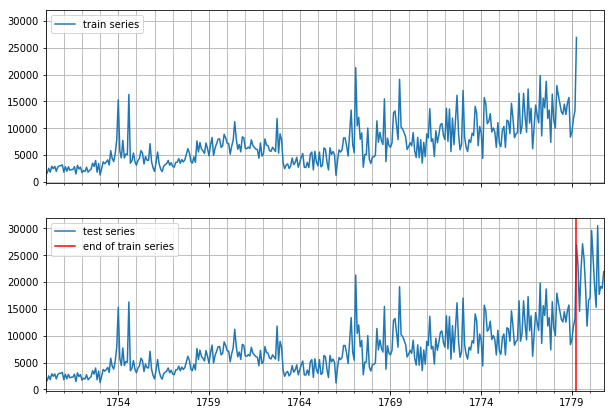

In [9]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [10]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [11]:
######################
### deepar wrapper ###
def deepar(data="m4_quarterly", seed=42, epochs=100, batches=50):

    dataset = get_dataset(data, regenerate=False)
    mx.random.seed(seed)
    np.random.seed(seed)

    trainer = Trainer(
        ctx=mx.cpu(0),
        epochs=epochs,
        num_batches_per_epoch=batches,
        learning_rate=1e-3,
    )
    
    estimator = DeepAREstimator(
        trainer=trainer,
        cardinality= [
            feat_static_cat.cardinality 
            for feat_static_cat in dataset.metadata.feat_static_cat
        ],
        context_length=dataset.metadata.prediction_length,
        prediction_length=dataset.metadata.prediction_length,
        freq=dataset.metadata.freq,
        use_feat_static_cat=True
    )

    # predictor = estimator.train(training_data=dataset.train,
    #                             validation_data=dataset.test)
    predictor = estimator.train(training_data=dataset.train)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset.test, predictor=predictor, num_samples=100
    )

    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series=len(dataset.test)
    )

    metrics = ["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}

    output["seed"] = seed
    output["epochs"] = epochs
    output["num_batches"] = batches

    df = pd.DataFrame([output])

    return df

## Results

## Study 1: `m4_monthly_end032014`

In [1]:
# results = pd.DataFrame()

# for i in range(42, 52):
#     print("Seed:", i)
#     df = deepar(data="m4_monthly_end032014", seed=i, epochs=100, batches=50)
#     pprint(df)
#     results = results.append(df)

# print(dataname)
# results

## Study 2: `m4_monthly_end052015`

In [5]:
dataname = "m4_monthly_end052015"
dataset = utils.get_dataset(dataname, regenerate=False)
len(dataset.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end052015.


15700

In [2]:
# results = pd.DataFrame()

# for i in range(42, 47):
#     print("Seed:", i)
#     df = deepar(data="m4_monthly_end052015", seed=i, epochs=400, batches=200)
#     pprint(df)
#     results = results.append(df)

# results

## Study 3: `m4_monthly_end092007`

In [7]:
dataname = "m4_monthly_end092007"
dataset = utils.get_dataset(dataname, regenerate=False)
len(dataset.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end092007.


943

In [3]:
# results = pd.DataFrame()

# for i in range(42, 47):
#     print("Seed:", i)
#     df = deepar(data="m4_monthly_end092007", seed=i, epochs=400, batches=200)
#     pprint(df)
#     results = results.append(df)

# results